In [3]:
# === Header ===
#
# @date: 05 / 07 / 2019 (Xi'an)
# @author: ZHE LI
# @title: Learned KD-Tree - Fully Learned
#
import math
import time
import random
#import pysnooper
# import pixiedust
import import_ipynb
# import statistics
import numpy as np
import import_ipynb # this can only be installed from pip (no conda)
from scipy import stats
from numpy import genfromtxt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from sklearn import preprocessing
from sklearn.preprocessing import normalize

In [4]:
# === Data Loading ===
original_domains = [\
    [1,1.20000000e+07],\
    [1,4.00000000e+05],\
    [1,2.00000000e+04],\
    [1,7.00000000e+00],\
    [1,5.00000000e+01],\
    [900.99,1.04899500e+05],\
    [0,1.00000000e-01],\
    [0,8.00000000e-02]\
]
original_domains = np.asarray(original_domains)
# original_dataset = genfromtxt('/Users/lizhe/Desktop/LearnedKDTree/DataAndWorkload/SyntheticData/TPCH_12M_8Field.csv', delimiter=',')
original_dataset = genfromtxt('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Legacy/data/TPCH_12M_8Field.csv', delimiter=',')

In [3]:
# print(np.min(original_dataset[:, 0]))
# print(np.max(original_dataset[:, 0]))
# print(np.min(original_dataset[:, 1]))
# print(np.max(original_dataset[:, 1]))
# print(np.min(original_dataset[:, 2]))
# print(np.max(original_dataset[:, 2]))
# print('variance for the first query dimension: ',np.var(dataset[:,0]))
# print('variance for the second query dimension: ',np.var(dataset[:,1]))
# print('variance for the third query dimension: ',np.var(dataset[:,2]))

In [5]:
# === Global Configuration ===

# dimension for query and build learned KD-Tree
used_dimensions = [1,2]

# testing set percentage
testing_set_percentage = 0.2

# percentage of each dimension
percentage_ = [1, 1]

# maximum expected ranges for distribution query
ranges_ = [40000, 2000]

# maximum expected ranges for random query
ranges_random_ = [10000, 500]

# maximum expected sigma
sigmas_ = [1000, 50]

# clusters amount
cluster_amount_ = 100

# queries in each cluster
queries_each_cluster_ = 10

# page block size, or the minimum number of records a partition should holds
block_size = 5000

domains_ = np.copy(original_domains)
domains_ = domains_[used_dimensions]
dataset = np.copy(original_dataset)
dataset = dataset[:,used_dimensions]

In [8]:
from QueryGeneration import *

In [ ]:
# # load query from file
# training_set = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Legacy/query/training.csv')
# testing_set = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Legacy/query/testing.csv')

In [7]:
# random_query, distribution_query, fusion_query= generate_query_with_random(100, 0.5, domains_, ranges_random_, cluster_amount_, ranges_, [0.1,0.1], True, True)

In [26]:
# training_set = fusion_query[0:int(len(fusion_query)/2)]
# testing_set = fusion_query[int(len(fusion_query)/2):]

In [24]:
# save_query(random_query, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/random.csv')
# save_query(distribution_query, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/distribution.csv')
# save_query(fusion_query, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/fusion.csv')
# save_query(training_set, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/training.csv')
# save_query(testing_set, 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/testing.csv')

# random_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/random.csv')
# distribution_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/distribution.csv')
# fusion_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/fusion.csv')
# training_set = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/training.csv')
# testing_set = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/testing.csv')

random_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_random.csv')
distribution_query = load_query('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_distribution.csv')

In [25]:
training_set = np.concatenate((random_query[0:10], distribution_query[0:40]), axis=0)
testing_set = np.concatenate((random_query[10:], distribution_query[40:]), axis = 0)

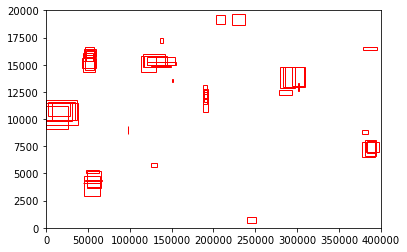

In [26]:
plot_queries_2d(training_set, domains_)

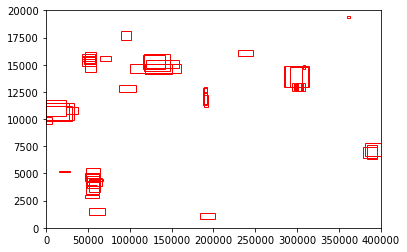

In [27]:
plot_queries_2d(testing_set, domains_)

In [29]:
# plot_queries_2d(fusion_query, domains_)
# plot_queries_2d_distribution_and_random(distribution_query, random_query, domains_)
# plot_queries_2d(training_set, domains_)
# plot_queries_2d(testing_set, domains_)

In [10]:
from Query import *

importing Jupyter notebook from Query.ipynb


In [28]:
# = = = Qd_tree construction = = =
# from Qd_tree import *
# start_time = time.time()
# Qd_tree_kdnodes = Qd_tree_greedy_optimized_approximate(dataset, training_set, domains_, block_size, bins=(40000,10000))
# end_time = time.time()
# print("training time for Qd_tree (s): ", end_time-start_time)
# print('Qd_tree leaf nodes: ',len(Qd_tree_kdnodes))
# # Qd_tree query
# Query(testing_set, Qd_tree_kdnodes)
# Query(training_set, Qd_tree_kdnodes)

from Qd_tree import *
start_time = time.time()
Qd_tree_kdnodes = Qd_tree_greedy_optimized_approximate(dataset, training_set, domains_, block_size, bins=(40000,10000))
end_time = time.time()
print("training time for Qd_tree (s): ", end_time-start_time)
print('Qd_tree leaf nodes: ',len(Qd_tree_kdnodes))
# Qd_tree query
Query(testing_set, Qd_tree_kdnodes)
Query(training_set, Qd_tree_kdnodes)

importing Jupyter notebook from Qd_tree.ipynb
current kdnodes:  1
current inner loop i:  0
current kdnodes:  2
current inner loop i:  0
current inner loop i:  1
current kdnodes:  4
current inner loop i:  0
current inner loop i:  1
current inner loop i:  2
current inner loop i:  3
current kdnodes:  8
current inner loop i:  0
current inner loop i:  1
current inner loop i:  2
current inner loop i:  3
current inner loop i:  4
current inner loop i:  5
current inner loop i:  6
current inner loop i:  7
current kdnodes:  16
current inner loop i:  0
current inner loop i:  1
current inner loop i:  2
current inner loop i:  3
current inner loop i:  4
current inner loop i:  5
current inner loop i:  6
current inner loop i:  7
current inner loop i:  8
current inner loop i:  9
current inner loop i:  10
current inner loop i:  11
current inner loop i:  12
current inner loop i:  13
current inner loop i:  14
current inner loop i:  15
current kdnodes:  32
current inner loop i:  0
current inner loop i:  1
c

In [13]:
from LKD_Robust import *
start_time = time.time()
filterd_Qd_tree_kdnodes = LKD_Robust(dataset, distribution_query, domains_, block_size, bins=(40000,10000))
LKD_Robust_kdnodes = post_kdnode_partition(filterd_Qd_tree_kdnodes, block_size, dataset)
end_time = time.time()
print("training time for Qd_tree (s): ", end_time-start_time)
print('Qd_tree leaf nodes: ',len(Qd_tree_kdnodes))
# Qd_tree query
Query(random_query, LKD_Robust_kdnodes)
Query(testing_set, LKD_Robust_kdnodes)
Query(training_set, LKD_Robust_kdnodes)

importing Jupyter notebook from LKD_Robust.ipynb


In [ ]:
from LKD import *
start_time = time.time()
LKD_kdnodes = FastLearnedResuriveDivide(dataset, training_set, domains_, block_size, 0)
end_time = time.time()
print("training time for LKD Advanced(s): ", end_time-start_time)
print('LKD leaf nodes: ',len(LKD_kdnodes))
# LKD Query:
Query(testing_set, LKD_kdnodes)
Query(training_set, LKD_kdnodes)

In [23]:
import import_ipynb # this can only be installed from pip (no conda)
from QueryTree import *
from LKDAdvanced1 import *
training_set_file_path = 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Legacy/query/training.csv'
query_trees = CreateQueryTree(training_set_file_path, len(domains_))
start_time = time.time()
LKD_Advanced_kdnodes = LKDAdvanced(dataset, query_trees, domains_, block_size, 0)
end_time = time.time()
print("training time for LKD Advanced(s): ", end_time-start_time)
print('LKD Advanced leaf nodes: ',len(LKD_Advanced_kdnodes))
# LKD Advanced Query:
Query(testing_set, LKD_Advanced_kdnodes)
Query(training_set, LKD_Advanced_kdnodes)

In [28]:
from LKDAdvanced2 import *
start_time = time.time()
LKD_Advanced2_kdnodes = LKDAdvanced2(dataset, np.array(training_set), domains_, block_size, 0)
end_time = time.time()
print("training time for LKD Advanced(s): ", end_time-start_time)
print('LKD Advanced leaf nodes: ',len(LKD_Advanced2_kdnodes))
# LKD Advanced 2 Query:
Query(testing_set, LKD_Advanced2_kdnodes)
Query(training_set, LKD_Advanced2_kdnodes)

In [11]:
from LKDAdvanced3 import *
start_time = time.time()
LKD_Advanced3_kdnodes = LKDAdvanced3(dataset, np.array(training_set), domains_, block_size, 0)
end_time = time.time()
print("training time for LKD Advanced(s): ", end_time-start_time)
print('LKD Advanced leaf nodes: ',len(LKD_Advanced3_kdnodes))
# LKD Advanced 3 Query:
Query(testing_set, LKD_Advanced3_kdnodes)
Query(training_set, LKD_Advanced3_kdnodes)

In [16]:
from RtreeBulkloading import *
BulkLoadMBRs = GenerateRtreePartitionUsingBulkLoading(dataset, maximum_capacity = 10000)
print(BulkLoadMBRs)
np.savetxt('C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Legacy/data/RtreeBulkLoadPartitions_1W.csv', BulkLoadMBRs, delimiter=',')
rtree_kdnodes = PartitionFormalization(BulkLoadMBRs)
# print(rtree_partitions.shape)
print(len(rtree_kdnodes))
# RTree Query:
Query(testing_set, rtree_kdnodes)

importing Jupyter notebook from RtreeBulkloading.ipynb


In [7]:
from TraditionalKDTree import *
traditional_kdnodes = TraditionalKDTree(dataset, 0, domains_, block_size, 0)
# traditional_variance_kdnodes = TraditionalVarianceKDTree(dataset, domains_, block_size, 0)
print('traditional KD-Tree leaf nodes: ', len(traditional_kdnodes))
# print('traditional variance KD-Tree leaf nodes: ', len(traditional_variance_kdnodes))
Query(testing_set, traditional_kdnodes)

# dense_traditional_kdnodes = DenseKDNodes(traditional_kdnodes, block_size)
# QueryDense(testing_set, dense_traditional_kdnodes)
# print("=========")
# Query(testing_set, traditional_variance_kdnodes)
# dense_traditional_variance_kdnodes = DenseKDNodes(traditional_variance_kdnodes, block_size)
# QueryDense(testing_set, dense_traditional_variance_kdnodes)

traditional KD-Tree leaf nodes:  2048


In [ ]:
from AQWA import *

In [26]:
imported_kdnodes = ImportKDNodes() # the kdnodes that have been KD partitioned and insert remaining data into

In [27]:
start_time = time.time()
AQWA_kdnodes = AQWAPartition(imported_kdnodes, dataset, domains_, block_size, training_set, m=40000, n=2000)
end_time = time.time()
print("training time for fast Learned KD-Tree(s): ", end_time-start_time)

Processing queries No.  0
Processing queries No.  1
Processing queries No.  2
Processing queries No.  3
Processing queries No.  4
Processing queries No.  5
Processing queries No.  6
Processing queries No.  7
Processing queries No.  8
Processing queries No.  9
Processing queries No.  10
Processing queries No.  11
Processing queries No.  12
Processing queries No.  13
Processing queries No.  14
Processing queries No.  15
Processing queries No.  16
Processing queries No.  17
Processing queries No.  18
Processing queries No.  19
Processing queries No.  20
Processing queries No.  21
Processing queries No.  22
Processing queries No.  23
Processing queries No.  24
Processing queries No.  25
Processing queries No.  26
Processing queries No.  27
Processing queries No.  28
Processing queries No.  29
Processing queries No.  30
Processing queries No.  31
Processing queries No.  32
Processing queries No.  33
Processing queries No.  34
Processing queries No.  35
Processing queries No.  36
Processing 

Processing queries No.  271
Processing queries No.  272
Processing queries No.  273
Processing queries No.  274
Processing queries No.  275
Processing queries No.  276
Processing queries No.  277
Processing queries No.  278
Processing queries No.  279
Processing queries No.  280
Processing queries No.  281
Processing queries No.  282
Processing queries No.  283
Processing queries No.  284
Processing queries No.  285
Processing queries No.  286
Processing queries No.  287
Processing queries No.  288
Processing queries No.  289
Processing queries No.  290
Processing queries No.  291
Processing queries No.  292
Processing queries No.  293
Processing queries No.  294
Processing queries No.  295
Processing queries No.  296
Processing queries No.  297
Processing queries No.  298
Processing queries No.  299
Processing queries No.  300
Processing queries No.  301
Processing queries No.  302
Processing queries No.  303
Processing queries No.  304
Processing queries No.  305
Processing queries N

Processing queries No.  513
Processing queries No.  514
Processing queries No.  515
Processing queries No.  516
Processing queries No.  517
Processing queries No.  518
Processing queries No.  519
Processing queries No.  520
Processing queries No.  521
Processing queries No.  522
Processing queries No.  523
Processing queries No.  524
Processing queries No.  525
Processing queries No.  526
Processing queries No.  527
Processing queries No.  528
Processing queries No.  529
Processing queries No.  530
Processing queries No.  531
Processing queries No.  532
Processing queries No.  533
Processing queries No.  534
Processing queries No.  535
Processing queries No.  536
Processing queries No.  537
Processing queries No.  538
Processing queries No.  539
Processing queries No.  540
Processing queries No.  541
Processing queries No.  542
Processing queries No.  543
Processing queries No.  544
Processing queries No.  545
Processing queries No.  546
Processing queries No.  547
Processing queries N

Processing queries No.  740
Processing queries No.  741
Processing queries No.  742
Processing queries No.  743
Processing queries No.  744
Processing queries No.  745
Processing queries No.  746
Processing queries No.  747
Processing queries No.  748
Processing queries No.  749
Processing queries No.  750
Processing queries No.  751
Processing queries No.  752
Processing queries No.  753
Processing queries No.  754
Processing queries No.  755
Processing queries No.  756
Processing queries No.  757
Processing queries No.  758
Processing queries No.  759
Processing queries No.  760
Processing queries No.  761
Processing queries No.  762
Processing queries No.  763
Processing queries No.  764
Processing queries No.  765
Processing queries No.  766
Processing queries No.  767
Processing queries No.  768
Processing queries No.  769
Processing queries No.  770
Processing queries No.  771
Processing queries No.  772
Processing queries No.  773
Processing queries No.  774
Processing queries N

In [28]:
AQWA_kdnodes_copy = copy.deepcopy(AQWA_kdnodes)
ExportKDNodes(AQWA_kdnodes_copy, path='C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Legacy/data/AQWA_partitions.csv')
exported_AQWA_kdnodes = ExportKDNodes(AQWA_kdnodes_copy)

In [29]:
print(len(AQWA_kdnodes))

1035


In [26]:
imported_AQWA_kdnodes = ImportKDNodes()
Query(testing_set, imported_AQWA_kdnodes)
Query(training_set, imported_AQWA_kdnodes)

In [98]:
# === KDTree Visualization ===
#
# restricted to 2D
#
# @kdnodes: the generated kdnodes, domains in them are ordered according to the learned split dimension order,
#   should only generated on the domains for visualization?
# @query: the query in the query dimension order, should be the same as the order of 'kdnode domains'
# @domains: the domains for visualization, should be in the origin order
# @realtive_order: whether to adjust the order of domains in kdnodes to corresponding the 'domains' parameteer
#
def visualize_kdnodes_and_query(kdnodes, query, domains):
    
    fig, ax = plt.subplots(1)
    
    plt.xlim(domains[0][0],domains[0][1])
    plt.ylim(domains[1][0],domains[1][1])
    # transform the queries into boxes
    
    # first plot all the kdnodes
    for i in range(len(kdnodes)):
        
        kd_domains = kdnodes[i][0]
        kd_domains = np.asarray(kd_domains)
        
        lower1 = kd_domains[0][0]
        upper1 = kd_domains[0][1]
        lower2 = kd_domains[1][0]
        upper2 = kd_domains[1][1]
        
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='g',linewidth=1)
        ax.add_patch(rect)
    
    # plot the queries
    for i in range(len(query)):
        
        lower1 = query[i][0][0]
        upper1 = query[i][0][1]
        lower2 = query[i][1][0]
        upper2 = query[i][1][1]
        
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='r',linewidth=3)
        ax.add_patch(rect)
        
    plt.show()
    
def visualize_kdnodes_and_query_2(kdnodes, d_query, r_query, domains, path=None):
    
    fig, ax = plt.subplots(1)
    
    plt.xlim(domains[0][0],domains[0][1])
    plt.ylim(domains[1][0],domains[1][1])
    # transform the queries into boxes
    
    # first plot all the kdnodes
    for i in range(len(kdnodes)):
        
        kd_domains = kdnodes[i][0]
        kd_domains = np.asarray(kd_domains)
        
        lower1 = kd_domains[0][0]
        upper1 = kd_domains[0][1]
        lower2 = kd_domains[1][0]
        upper2 = kd_domains[1][1]
        
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='g',linewidth=1)
        ax.add_patch(rect)
    
    # plot the queries
    for i in range(len(d_query)):
        
        lower1 = d_query[i][0][0]
        upper1 = d_query[i][0][1]
        lower2 = d_query[i][1][0]
        upper2 = d_query[i][1][1]
        
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='r',linewidth=2)
        ax.add_patch(rect)
        
    for i in range(len(r_query)):
        
        lower1 = r_query[i][0][0]
        upper1 = r_query[i][0][1]
        lower2 = r_query[i][1][0]
        upper2 = r_query[i][1][1]
        
        rect = Rectangle((lower1,lower2),upper1-lower1,upper2-lower2,fill=False,edgecolor='b',linewidth=2)
        ax.add_patch(rect)
    
    ax.set_xlabel('dim 1', fontsize=15)
    ax.set_ylabel('dim 2', fontsize=15)
    plt.xticks(np.arange(0, 400001, 100000), fontsize=10)
    plt.yticks(np.arange(0, 20001, 5000), fontsize=10)
    
    #plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0) # no margin at all
    plt.tight_layout() # preventing clipping the labels when save to pdf
    
    if path != None:
        fig.savefig(path)
    
    plt.show()

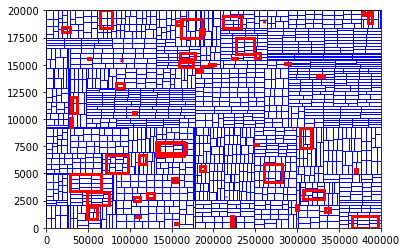

In [48]:
visualize_kdnodes_and_query(LKD_Robust_kdnodes, testing_set, domains_)

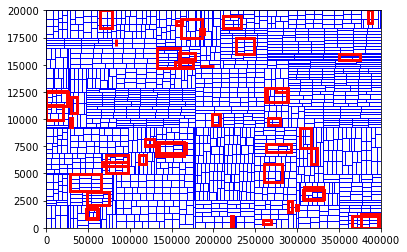

In [50]:
visualize_kdnodes_and_query(LKD_Robust_kdnodes, distribution_query, domains_)

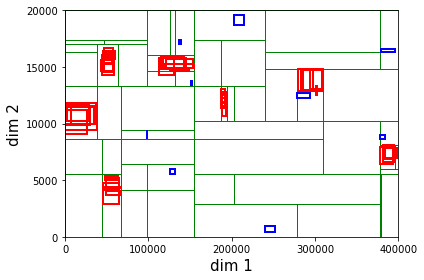

In [100]:
savepath1 = 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_training.pdf'
visualize_kdnodes_and_query_2(Qd_tree_kdnodes, distribution_query[0:40], random_query[0:9], domains_, savepath1)

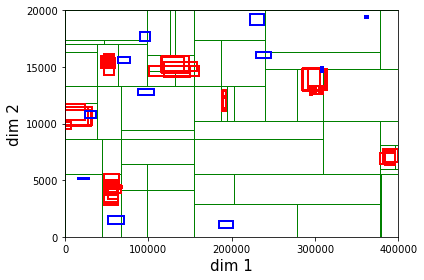

In [101]:
savepath2 = 'C:/Users/Cloud/iCloudDrive/HUAWEI_LKD/Dataset/Robust/query/intro_testing.pdf'
visualize_kdnodes_and_query_2(Qd_tree_kdnodes, distribution_query[40:], random_query[9:], domains_, savepath2)

In [821]:
# # === Baseline Performance 2D
# #
# # @dataset: the ordered dataset, contains only the columns to build, and ordered
# # @threshold: the block/page size
# #
# # return @minmaxnodes: contains all the min max info of all the build dimensions (in the build_dim order)
# #
# def MinMaxOrdering(dataset, threshold):
#     minmaxnodes = []
    
#     # currently sorted by A, B
#     dataset = dataset[np.lexsort((dataset[:,1], dataset[:,0]))]
    
#     count = 0;
#     total_size = len(dataset)
#     block_amount = math.ceil(total_size / threshold)
    
#     lower = 0;
#     upper = lower + threshold
    
#     # concat the results of each sorted nodes
#     for i in range(block_amount):
#         if upper > total_size:
#             upper = total_size
#         sub_dataset = dataset[lower:upper,:]
        
#         minmax_dim0 = [min(sub_dataset[:,0]),max(sub_dataset[:,0])]
#         minmax_dim1 = [min(sub_dataset[:,1]),max(sub_dataset[:,1])]
#         minmaxnodes.append([minmax_dim0, minmax_dim1])
        
#         lower += threshold
#         upper += threshold
        
#     return minmaxnodes


# def QueryMinMaxOrdering(queries, minmaxnodes):
    
#     counts = []
#     count_single_query = 0;
    
#     # number of dimensions
#     dims = int(len(queries[0]))
    
#     # for each query
#     for i in range(len(queries)):
        
#         count_single_query = 0
        
#         # check for intersection for each kdnode
#         for j in range(len(minmaxnodes)):
            
#             # for each dimension
#             intersection_tag = True
#             for k in range(dims):
                
#                 # an intersection holds if it intersecs in all dimensions
#                 if queries[i][k][0] >= minmaxnodes[j][k][1] or queries[i][k][1] <= minmaxnodes[j][k][0]:
#                     intersection_tag = False
#                     break
                
#             # if the query intersect with this kdnode
#             if intersection_tag:
#                 count_single_query += 1
            
#         counts.append(count_single_query)
    
#     #print("blocks IO: ", counts)
#     print("blocks IO(average): ", statistics.mean(counts))
    
# minmaxnodes = MinMaxOrdering(dataset, block_size)
# print('min max nodes amount: ',len(minmaxnodes))
# QueryMinMaxOrdering(testing_set, minmaxnodes)

In [822]:
# === Baseline Performance 3D
#
# @dataset: the ordered dataset, contains only the columns to build, and ordered
# @threshold: the block/page size
#
# return @minmaxnodes: contains all the min max info of all the build dimensions (in the build_dim order)
#
def MinMaxOrdering(dataset, threshold):
    minmaxnodes = []
    
    # currently sorted by A, B, C
    dataset = dataset[np.lexsort((dataset[:,2], dataset[:,1], dataset[:,0]))]
    
    count = 0;
    total_size = len(dataset)
    block_amount = math.ceil(total_size / threshold)
    
    lower = 0;
    upper = lower + threshold
    
    # concat the results of each sorted nodes
    for i in range(block_amount):
        if upper > total_size:
            upper = total_size
        sub_dataset = dataset[lower:upper,:]
        
        minmax_dim0 = [min(sub_dataset[:,0]),max(sub_dataset[:,0])]
        minmax_dim1 = [min(sub_dataset[:,1]),max(sub_dataset[:,1])]
        minmax_dim2 = [min(sub_dataset[:,2]),max(sub_dataset[:,2])]
        minmaxnodes.append([minmax_dim0, minmax_dim1, minmax_dim2])
        
        lower += threshold
        upper += threshold
        
    return minmaxnodes


def QueryMinMaxOrdering(queries, minmaxnodes):
    
    counts = []
    count_single_query = 0;
    
    # number of dimensions
    dims = int(len(queries[0]))
    
    # for each query
    for i in range(len(queries)):
        
        count_single_query = 0
        
        # check for intersection for each kdnode
        for j in range(len(minmaxnodes)):
            
            # for each dimension
            intersection_tag = True
            for k in range(dims):
                
                # an intersection holds if it intersecs in all dimensions
                if queries[i][k][0] >= minmaxnodes[j][k][1] or queries[i][k][1] <= minmaxnodes[j][k][0]:
                    intersection_tag = False
                    break
                
            # if the query intersect with this kdnode
            if intersection_tag:
                count_single_query += 1
            
        counts.append(count_single_query)
    
    #print("blocks IO: ", counts)
    print("blocks IO(average): ", statistics.mean(counts))
    
minmaxnodes = MinMaxOrdering(dataset, block_size)
print('min max nodes amount: ',len(minmaxnodes))
QueryMinMaxOrdering(testing_set, minmaxnodes)

min max nodes amount:  375
blocks IO(average):  337.84422110552765


In [823]:
# === Ignore PK ===¶
for i in range(len(testing_set)):
    testing_set[i][0][0] = domains_[0][0]
    testing_set[i][0][1] = domains_[0][1]
Query(testing_set, kdnodes)
QueryDense(testing_set, dense_kdnodes)
Query(testing_set, traditional_kdnodes)
QueryDense(testing_set, dense_traditional_kdnodes)
QueryMinMaxOrdering(testing_set, minmaxnodes)

blocks IO(average):  7.517587939698492
blocks IO(average):  9.809045226130653
blocks IO(average):  9.658291457286433
blocks IO(average):  15.864321608040202
blocks IO(average):  375


### 